# Python Homework

**Author(s):** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)


## Submission Instructions

Solve each of the problems described below. When you are done, print your Jupyter 
notebook into a PDF file from your browser. Keep your files (including this notebook 
file and a copy of your PDF file) in your Dropbox course folder. Upload only the pdf 
file on Blackboard.

## `getprostaterisk()`  [function, if]  [20pt]

Write a function that implements the decision tree for prostate cancer risk, as described 
in Figure 3 of "Decision Tree-Based Modeling of Androgen Pathway Genes and Prostate Cancer 
Risk", Cancer Epidemiol Biomarkers Prev. 2011 Jun; 20(6): 1146–1155. The figure is also 
given below. The numbers within each node indicate #controls/#prostate-cancer cases. 

- Your function needs to have an input argument for each variable being tested. 
- Your function should calculate and return #prostate/(#numprostate + #control). 
- You need to decide for yourself what input arguments should be given to this function. 
- One should be able to use your function to obtain the Prostate Risk value for a new patient. 
- Demonstrate your function with three test cases that fall under separate nodes in the decision tree.

<img src='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3111844/bin/nihms288508f3.jpg'>

In [1]:
# Define your function below:

def getprostaterisk(
    history: bool, 
    euro_ances: float, 
    repeat: int, 
    haplotype: str
) -> float:
    """
    Compute the risk of prostate cancer using factors identified in "Decision 
    Tree-Based Modeling of Androgen Pathway Genes and Prostate Cancer Risk", 
    Cancer Epidemiol Biomarkers Prev. 2011 Jun; 20(6): 1146–1155

    Parameters
    ----------
    history : bool
        Does the patient have family history of prostate cancer
    euro_ances : float
        The patient's European ancestry as a percentage (0.5 = 50%)  
    repeat : int
        The number of AR GGC repeat polymorphisms in the patient's genome
    haplotype : str
        The patient's CYP3A4/CYP3A5 haplotype, one of "AA", "AG", "GG", "GG"

    Returns
    -------
    risk : float
        The patient's risk of prostate cancer relative to the 
    """

    assert isinstance(history, bool), "history must either be True or False"
    assert 0 <= euro_ances <= 1, "euro_ances must be between 0 and 1"
    assert isinstance(repeat, int), "repeat must be an integer"
    assert isinstance(haplotype, str), \
        "haplotype must be one of 'AA', 'AG', 'GG', or 'GG'"
    haplotype = haplotype.upper()

    # Compute risk
    if history:
        if euro_ances >= 0.204:
            if haplotype in ['GA', 'AG', 'GG']:
                risk = 6.24
                denom = 7 + 14
            else:
                risk = 0.94
                denom = 10 + 3
        else:
            if repeat < 16:
                risk = 5.46
                denom = 4 + 7
            else:
                risk = 1.56
                denom = 38 + 19
    else:
        risk = 1.00
        denom = 343 + 110

    # return #prostate / (#numprostate + #control)
    return risk

#==============================================================================
# Add your test cases below:

assert getprostaterisk(True, 0.5, 16, 'GA') == 6.24
assert getprostaterisk(True, 0.1, 16, 'AA') == 1.56
assert getprostaterisk(False, 0.8, 12, 'GG') == 1.00

# `knearestneighbors()`  [function, list, for, if]  [20pt]

Write a function knearestneighbors(v, x, k) that takes a list of numbers v, and a number x; 
and returns the list of k numbers in v that are are nearest to x.  The list of numbers you 
return should be ordered according to how close they are to x (with the closest one listed 
first). If v has fewer entries than k, then return all numbers in v as the answer. If the 
argument k is not given, use k=3.

You may search for and use functions available in basic Python and/or in numpy. Using 
numpy is not required, but may simplify some of the tasks.

In [2]:
# Define your function below:

def knearestneighbors(v: list, x: float, k: int=3) -> list:
    """
    Find the k nearest neighbors of x in the list x

    Parameters
    ----------
    x : list
        List of numbers to search
    x : float
        The number to find the k nearest neighbors of
    k : int
        The number of nearest neighbors to return

    Returns
    -------
    neighbors : list
        The k nearest neighbors of x in the list x
    """

    assert isinstance(v, list), "x must be a list"
    assert k > 0, "k must be greater than 0"

    # Find the k nearest neighbors
    neighbors = sorted(v, key=lambda y: abs(y - x))[:k] 

    return neighbors

#==========================================================================================
# Add your test cases below:

# This test case should print: [73 77]
print( knearestneighbors([73,90,99,77,59], 70, 2 ) )

# This test case should print: [90 99]
print( knearestneighbors([73,90,99,77,59], 90, 2 ) )

# This test case should print: [90 90]
print( knearestneighbors([73,90,99,77,59,90], 90, 2 ) )

# This test case should print: [58 59 63]
print( knearestneighbors([91,58,85,74,59,25,67,9,63,67], 57 ) )

[73, 77]
[90, 99]
[90, 90]
[58, 59, 63]


# `filterpatients()`  [functions, list, dictionary, for (or list comprehension)]  [20pt]

You are working at a hospital's IT department. The hospital is recruiting patients for 
clinical trial of a new drug. In the current phase of the clinical trial, only female 
patients between the ages of 30 (inclusive) to 40 (inclusive) are being recruited. 
Your boss wants you to filter out the database of volunteer patients and extract the names 
of those matching the criteria. 
- Write a function filterpatients that takes as input the list of patients in the database, 
- where each patient is encoded as a python dictionary and 
- returns the names of eligible patients as a list of strings. 
- Assume that the gender is always given in lower case, either as 'f' or 'm'.

In [3]:
# Modify the template function given below:
def filterpatients(patients: list) -> list:
    """
    Filter out female patients between 30 and 40 (inclusive) from a list of 
    patients.

    Parameters
    ----------
    patients : list
        A list of dictionaries which define the patient's name, gender and age

    Returns
    -------
    patients : list
        List of patient names
    """

    assert isinstance(patients, list), "patients must be a list"

    return [p['name'] for p in patients if 30 <= p['age'] <= 40 and p['gender'] == 'f']

#==========================================================================================
# Do not change the test cases below
# After you complete the filterpatients() function above, run this Cell to produce the output.

# This test case should print: ['anna', 'elaina']
print( filterpatients( [ {'name':'mary','gender':'f','age':25},\
                       {'name':'john','gender':'m','age':35},\
                       {'name':'anna','gender':'f','age':30},\
                       {'name':'paul','gender':'m','age':22},\
                       {'name':'elaina','gender':'f','age':38} ] ) )
# This test case should print: ['mary']
print( filterpatients( [ {'name':'mary','gender':'f','age':37},\
                       {'name':'john','gender':'m','age':35} ] ) )

['anna', 'elaina']
['mary']


# Clover Graph  [plotting] [10pt]

Draw a graph that should resemble a four-leafed clover, using The following equations:

$x = cos(2t) cos(t)$

$y = cos(2t) sin(t)$


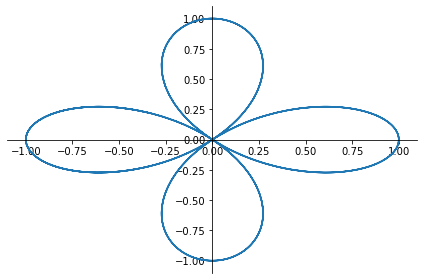

In [4]:
from sympy import cos, sin, plot_parametric
from sympy.abc import t

xfun = cos(2*t) * cos(t)
yfun = cos(2*t) * sin(t)

plot_parametric((xfun, yfun));

# Symbolic Math [10pt]


Find the derivative of $f(x)=Ae^{-cos(x)}$ with respect to x.

In [5]:
from sympy.abc import x, A
from sympy import exp, cos, diff

fx = A * exp(-cos(x))
diff(fx, x)

A*exp(-cos(x))*sin(x)

Find the roots of the equation $x^2 + x = 12$

In [6]:
from sympy.abc import x
from sympy import solve, Eq

eqn = Eq(x**2 + x, 12)
print(f"Roots: {solve(eqn)}")

Roots: [-4, 3]


# `searchinfile()`  [file, string, list, for (or list comprehension)]  [20pt]

- Define searchinfile(filename,keyword) function in a python file `searchinfile.py`
- Your function should return a list of the line numbers where the keyword 
  appears (case insensitively) in that file.

In [7]:
# Do not make any changes to the code within this Cell.
# After completing your searchinfile.py file, run this Cell to produce the test-case print-outs.

%load_ext autoreload
%autoreload 2

# Create some example files.
with open('searchinfile_sample1.txt', 'w') as f: f.write('apple\norange\nbanana\nraspberry\nstrawberry')
with open('searchinfile_sample2.txt', 'w') as f: f.write('cherry\nblueberry\nelderberry')
    
import os;
if os.path.exists('searchinfile.py'):
    import searchinfile
    # this test case should print [2]
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'orange') )
    
    # this test case should print [4, 5]
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'BERRY') )

    # this test case should print []
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'watermelon') )
    
    # this test case should print [2, 3]
    print( searchinfile.searchinfile('searchinfile_sample2.txt', 'berry') )

[2]
[4, 5]
[]
[2, 3]
